In [11]:
import pandas as pd
df=pd.read_csv('./video.phase.trainingData.clean.StudentVersion.csv')

In [12]:
#visualize 
pd.set_option('display.max_rows', None)
df

,videoName,PhaseName,Start,End
0,RALIHR_surgeon01_fps01_0001,Access,---,---
1,RALIHR_surgeon01_fps01_0001,Stationary Idle1,00:00,00:16
2,RALIHR_surgeon01_fps01_0001,Transitionary Idle1,00:16,00:35
3,RALIHR_surgeon01_fps01_0001,Out of body,00:35,01:05
4,RALIHR_surgeon01_fps01_0001,Transitionary Idle2,01:05,01:59
5,RALIHR_surgeon01_fps01_0001,Peritoneal Scoring,01:59,02:55
6,RALIHR_surgeon01_fps01_0001,Preperioneal dissection,02:55,06:43
7,RALIHR_surgeon01_fps01_0001,Reduction of hernia,06:43,15:58
8,RALIHR_surgeon01_fps01_0001,Transitionary Idle3,15:58,16:05
9,RALIHR_surgeon01_fps01_0001,Stationary Idle2,16:05,17:24


In [13]:
#rows to be deleted
for index, row in df.iterrows():
    if not any(char.isdigit() for char in row['Start']):
        print(row['PhaseName'],row['Start'],row['End'])
        print(index)

Access --- ---
0
Access --- ---
24
Access --- ---
64


In [14]:
#deleting rows
df=df.drop(df.index[[0,24,64]])
for index, row in df.iterrows():
   
    if not any(char.isdigit() for char in row['Start']):
        print(row['PhaseName'],row['Start'],row['End'])
        print(index)

In [15]:
#creating labels by removing the numbers
df['label']=df['PhaseName'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))


In [16]:
l={}
for index, row in df.iterrows():
    if row['label'].lower() not in l:
        l[row['label'].lower()]=1
    else:
        l[row['label'].lower()]+=1


In [17]:
from pprint import pprint
pprint(l)
fix={'cathter insertion':'catheter insertion', 'mesh positioning ':'mesh positioning','positioning of suture':'positioning suture','positioining suture':"positioning suture",
    "preperioneal dissection":'preperitoneal dissection','preperitoneal dissection ':'preperitoneal dissection','prepertioneal dissection':'preperitoneal dissection','prepetioneal dissection':'preperitoneal dissection','prepreitoneal dissection':'preperitoneal dissection',
    'suture positioining':'suture positioning',
    'transitiionary idle':'transitionary idle','transitioning idle':'transitionary idle','transtiionary idle':'transitionary idle','transtionary idle':'transitionary idle','transtitionary idle':'transitionary idle',
    'perperitoneal dissection':'preperitoneal dissection'}

{'acquiring suture': 1,
 'adhesiolysis': 6,
 'blurry': 3,
 'catheter insertion': 68,
 'cathter insertion': 1,
 'direct hernia repair': 2,
 'mesh placement': 146,
 'mesh positioning': 58,
 'mesh positioning ': 1,
 'out of body': 46,
 'peritoneal closure': 216,
 'peritoneal scoring': 107,
 'perperitoneal dissection': 2,
 'positioining suture': 4,
 'positioning of suture': 30,
 'positioning suture': 337,
 'preperioneal dissection': 1,
 'preperitoneal dissection': 101,
 'preperitoneal dissection ': 1,
 'prepertioneal dissection': 1,
 'prepetioneal dissection': 1,
 'prepreitoneal dissection': 2,
 'primary hernia repair': 5,
 'reduction of hernia': 126,
 'stationary idle': 79,
 'suture positioining': 2,
 'suture positioning': 5,
 'transitiionary idle': 1,
 'transitionary idle': 659,
 'transitioning idle': 2,
 'transtiionary idle': 4,
 'transtionary idle': 3,
 'transtitionary idle': 1}


In [19]:
for index, row in df.iterrows():
    if row['label'].lower() in fix:
        row['label']=fix[row['label'].lower()]

l={}
for index, row in df.iterrows():
    if row['label'].lower() not in l:
        l[row['label'].lower()]=1
    else:
        l[row['label'].lower()]+=1
pprint(l)
name_to_num={}
for i,key in enumerate(l):
    name_to_num[key]=i

{'acquiring suture': 1,
 'adhesiolysis': 6,
 'blurry': 3,
 'catheter insertion': 69,
 'direct hernia repair': 2,
 'mesh placement': 146,
 'mesh positioning': 59,
 'out of body': 46,
 'peritoneal closure': 216,
 'peritoneal scoring': 107,
 'positioning suture': 371,
 'preperitoneal dissection': 109,
 'primary hernia repair': 5,
 'reduction of hernia': 126,
 'stationary idle': 79,
 'suture positioning': 7,
 'transitionary idle': 670}


In [20]:
df['class']=df['label'].apply(lambda x: name_to_num[x.lower()])
df

,videoName,PhaseName,Start,End,label,class
1,RALIHR_surgeon01_fps01_0001,Stationary Idle1,00:00,00:16,Stationary Idle,0
2,RALIHR_surgeon01_fps01_0001,Transitionary Idle1,00:16,00:35,Transitionary Idle,1
3,RALIHR_surgeon01_fps01_0001,Out of body,00:35,01:05,Out of body,2
4,RALIHR_surgeon01_fps01_0001,Transitionary Idle2,01:05,01:59,Transitionary Idle,1
5,RALIHR_surgeon01_fps01_0001,Peritoneal Scoring,01:59,02:55,Peritoneal Scoring,3
6,RALIHR_surgeon01_fps01_0001,Preperioneal dissection,02:55,06:43,preperitoneal dissection,4
7,RALIHR_surgeon01_fps01_0001,Reduction of hernia,06:43,15:58,Reduction of hernia,5
8,RALIHR_surgeon01_fps01_0001,Transitionary Idle3,15:58,16:05,Transitionary Idle,1
9,RALIHR_surgeon01_fps01_0001,Stationary Idle2,16:05,17:24,Stationary Idle,0
10,RALIHR_surgeon01_fps01_0001,Transitionary Idle4,17:24,18:20,Transitionary Idle,1


In [40]:
#309 -53:45
df.at[309,'Start']='53:33'
df

,videoName,PhaseName,Start,End,label,class,Start_sec,End_sec
1,RALIHR_surgeon01_fps01_0001,Stationary Idle1,00:00,00:16,Stationary Idle,0,0,16
2,RALIHR_surgeon01_fps01_0001,Transitionary Idle1,00:16,00:35,Transitionary Idle,1,16,35
3,RALIHR_surgeon01_fps01_0001,Out of body,00:35,01:05,Out of body,2,35,65
4,RALIHR_surgeon01_fps01_0001,Transitionary Idle2,01:05,01:59,Transitionary Idle,1,65,119
5,RALIHR_surgeon01_fps01_0001,Peritoneal Scoring,01:59,02:55,Peritoneal Scoring,3,119,175
6,RALIHR_surgeon01_fps01_0001,Preperioneal dissection,02:55,06:43,preperitoneal dissection,4,175,403
7,RALIHR_surgeon01_fps01_0001,Reduction of hernia,06:43,15:58,Reduction of hernia,5,403,958
8,RALIHR_surgeon01_fps01_0001,Transitionary Idle3,15:58,16:05,Transitionary Idle,1,958,965
9,RALIHR_surgeon01_fps01_0001,Stationary Idle2,16:05,17:24,Stationary Idle,0,965,1044
10,RALIHR_surgeon01_fps01_0001,Transitionary Idle4,17:24,18:20,Transitionary Idle,1,1044,1100


In [26]:
df['Start_sec']=df['Start'].apply(lambda x: int(x[0:2])*60+int(x[3:]) if len(x)==5 else int(x[0:2])*3600+int(x[3:5])*60 + int(x[6:]))

In [28]:
df['End_sec']=df['End'].apply(lambda x: int(x[0:2])*60+int(x[3:]) if len(x)==5 else int(x[0:2])*3600+int(x[3:5])*60 + int(x[6:]))

In [31]:
df.apply(lambda x: x['Start_sec']<x['End_sec'])

KeyError: 'Start_sec'

In [11]:
#todo extract frames
#upload to sorage

import os

import multiprocessing
import workers
import numpy as np
def transform_all(data_path="./data"):
    
    directory = os.fsencode(data_path)
    njobs=2
    with multiprocessing.Pool(3) as p:
        results=p.map(workers.process_vid, os.listdir(directory))
    return results
transform_all()
#for file in os.listdir(directory):
#    process_vid(file,data_path)


['SUCCESS ./data\\RALIHR_surgeon01_fps01_0142',
 'SUCCESS ./data\\RALIHR_surgeon01_fps01_0176',
 'SUCCESS ./data\\RALIHR_surgeon01_fps01_0183']

In [6]:
import sys
print(sys.path[1])

C:\Users\nguye\anaconda3\envs\envDL\DLLs


In [1]:
import torchvision.io as io


In [2]:
x=io.read_video('./RALIHR_surgeon01_fps01_0142.mp4')

In [7]:
x[0].shape

torch.Size([3058, 480, 768, 3])

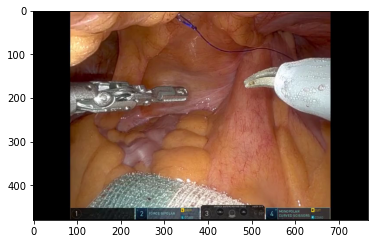

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x[0][0])